In [1]:
# import libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')

# basic model building libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# getting dataset
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# checking dimension
df.shape

(614, 13)

In [4]:
# getting general info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

From above we can observe data our data set has both categorical and numerical columns. And our dataset also contain some missing values. Let's check the total number of missing values column wise before moving ahead.


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As data is real world data, I think it would be better if we drop null values row.

In [6]:
df.dropna(inplace= True)
print(df.isnull().sum())
print(df.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(480, 13)


% dataloss= 
(614-480)/614 * 100 = 20% approx, In my opinion it is acceptable as we get clean and complete data to read from. Let's check the type of data.

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Categorical Columns: Loan_Id(Its just identification number),
Gender(Male/Female), Married(Yes/No), Dependents(number 0, 1,2, etc), Education (Graduate/ not Graduate), Self_Employed
(Yes/No), Property_Area (Urban/SubUrban etc), Loan_status(Y/N).


Continuous columns: ApplicantIncome, CpapplicantIncome, LoanAmount, Loan_Amount_term, Credit_History.

From here we can observe that Loan_Id is merely an ID number, I don't think it is an useful column for ML Model building. So let's drop it.

In [8]:
# dropping Loan_Id column
df= df.drop('Loan_ID', axis=1)
df.shape

(480, 12)

In [9]:
# Statistical analysis.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


WE can observe that Credit_History has value 0 and 1, , the data looks good so far. Let's proceed with EDA.

# EDA

In [10]:

# mapping Loan Status (N=0, Y=1)
df['Loan_Status']= df['Loan_Status'].map({'N': 0, 'Y': 1}).astype(int)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


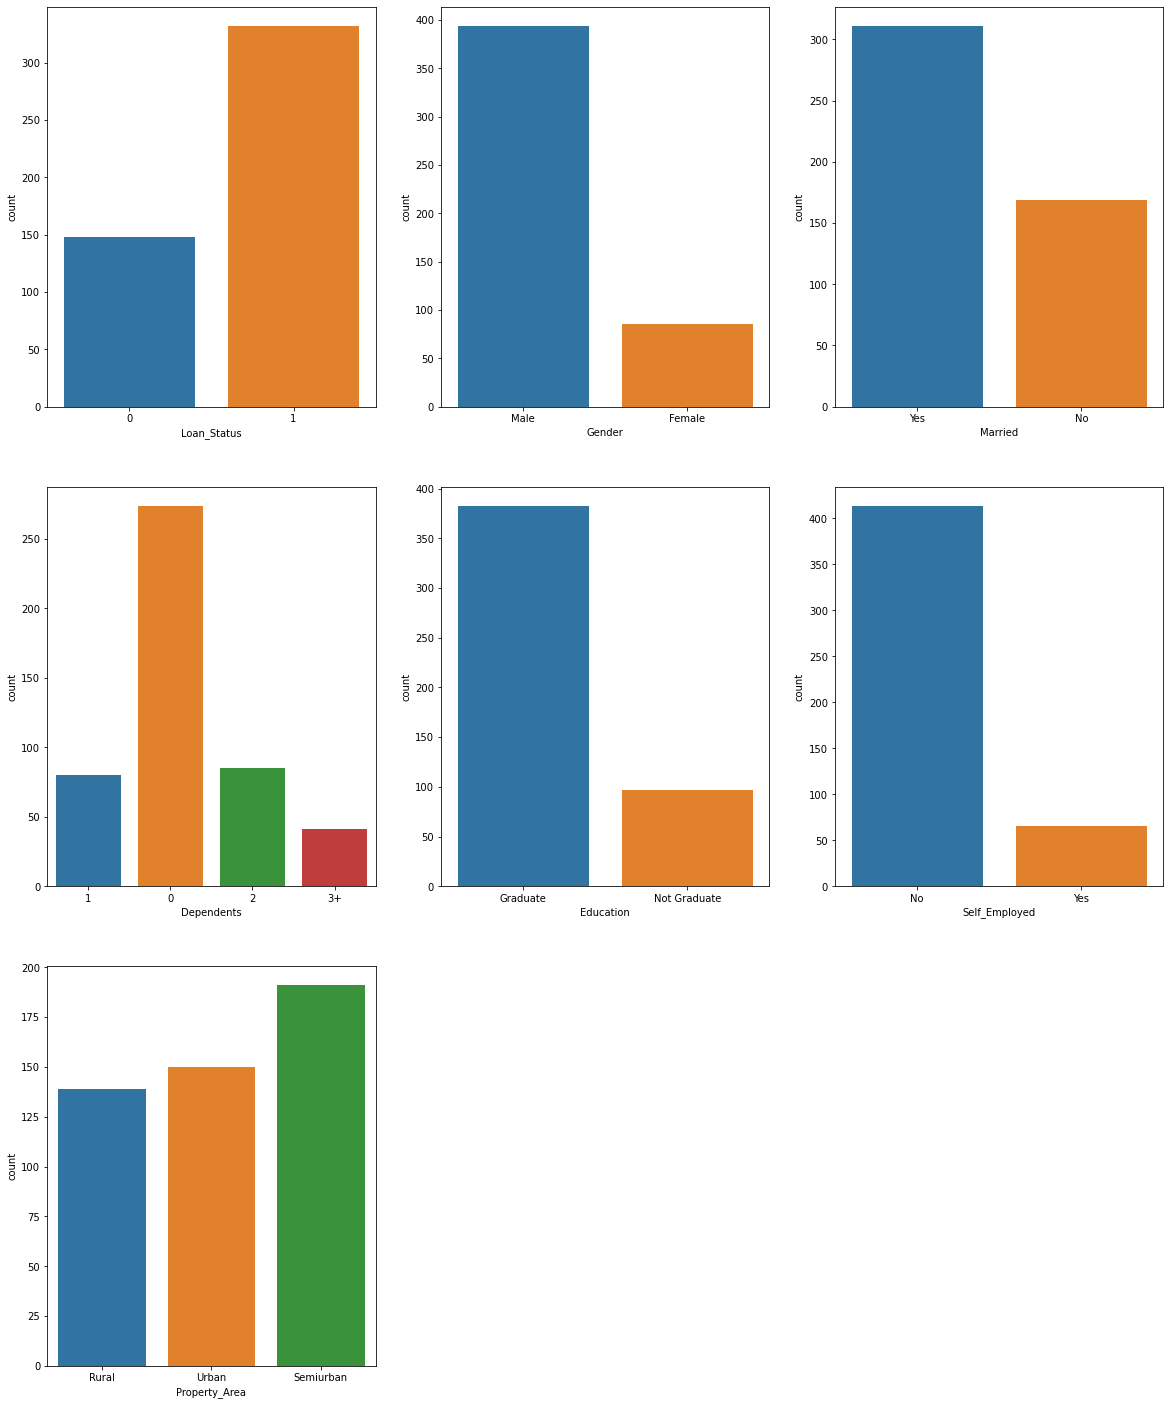

In [12]:
# Univariate Analysis:
cat_features= ['Loan_Status', 'Gender','Married','Dependents','Education','Self_Employed','Property_Area']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df[cat_features]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[column])
    plotnumber+=1
plt.show()



We can observe that mostly Loan got approved, also number of Male applied for Loan are greater than that of Female. Similarly married person applied for Loan are greater than that of Not married. For Dependents point of view, person with Zero dependent tends to apply for loan is highest, And there are very less number of people with more than 3 dependents are applying for loan.

More Graduate than Nongraduate applied for loan, similarly people who are not Self employed applied for loan more than people who are self employed.

As per preoperty area, people live in semiurban locations tend to applied for loans is highest. 

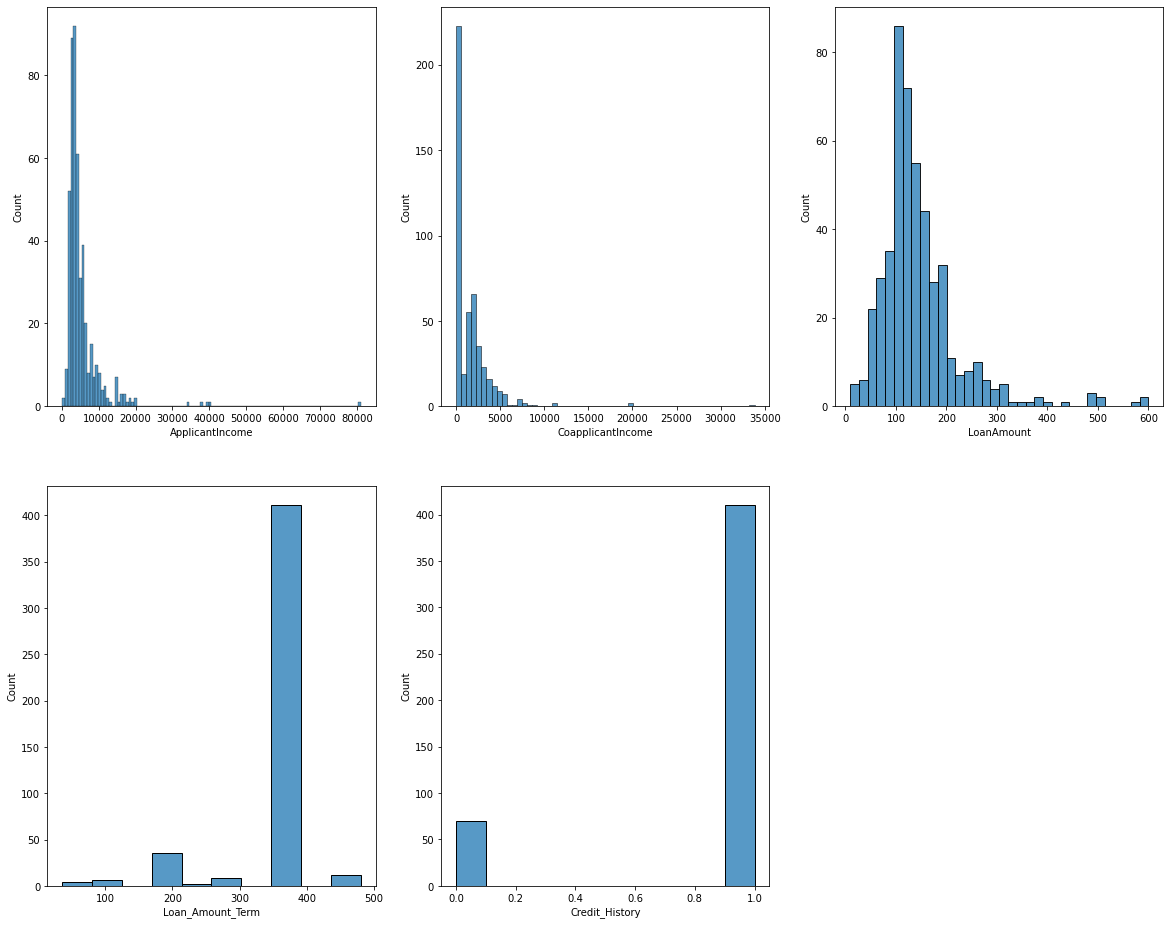

In [13]:
conti_features=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History']

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df[conti_features]:
    if plotnumber<=5:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
    plotnumber+=1
plt.show()


We can observe that our data is provided with majority of credit histrory, and the loan term of 360 looks to be highest.
The Loan amount shows proper outlier with some outlier. As thsi is Loan case we don't consider outlier removal, as there is strong possibility that person can applied for big loan amount. And ApplicantIncome column can also get some wide range. Here we can observe a bell curve of applicant income from 0-15000, most pof the data consist of applicant Income under 20000, while a few shows income more that 30000. 

Here '0' in credit History denotes no credit history while 1 denote has credit history.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

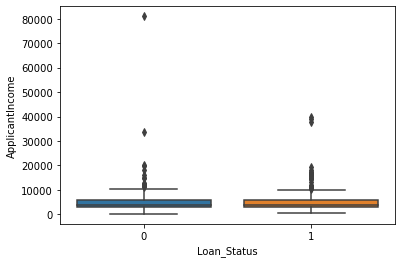

In [14]:
# MultiVariate Analysis.

# let's see how ApplicantIncome is connected with Loan_status.
sns.boxplot('Loan_Status', 'ApplicantIncome', data=df)

We can see that applicantIncome under 20000 can easily get loan approved and don't approve as well, the mean of 0 and 1 are almost the same.

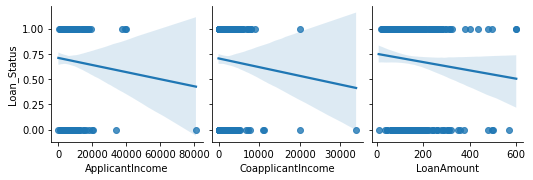

In [15]:
sns.pairplot(x_vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], y_vars='Loan_Status', data=df, kind='reg')

They show almost similar relation for loan approved or not.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

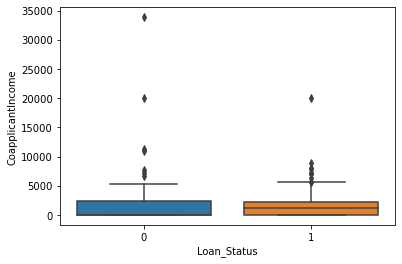

In [16]:
sns.boxplot('Loan_Status','CoapplicantIncome', data=df)

The mean of coapplicant income is slightly higher for 1 than that of zero.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

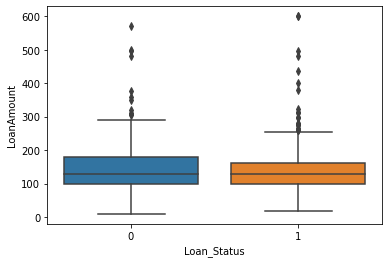

In [17]:
sns.boxplot('Loan_Status', 'LoanAmount', data=df)

We can observe that the 25% and 75% quantile of 0 is higher than that 1, but then also the mean of 0(Not approved) 1(approved) are same.

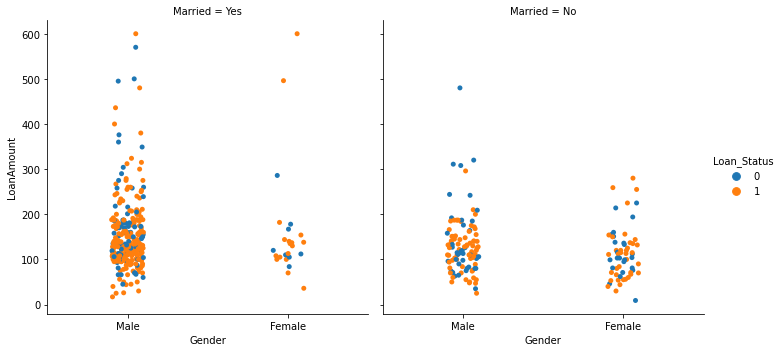

In [18]:
sns.catplot(x='Gender',y='LoanAmount', data=df, hue='Loan_Status', col='Married')

If you are married then the LoanAmount is slightly higher than not Married. One more thing caught my attention is that there are less married Female applied for loan than that of unmarried Female.

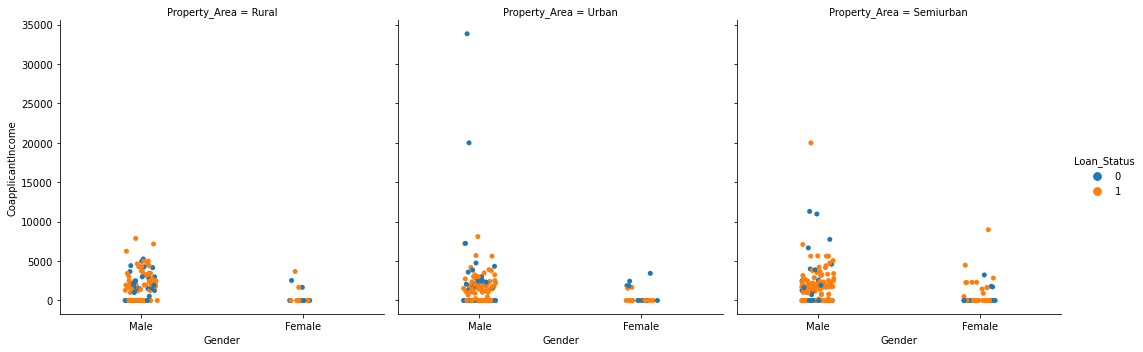

In [19]:
sns.catplot(x='Gender', y='CoapplicantIncome', data=df, hue='Loan_Status', col= 'Property_Area')

Male has more coapplicant income than female in all the three areas.

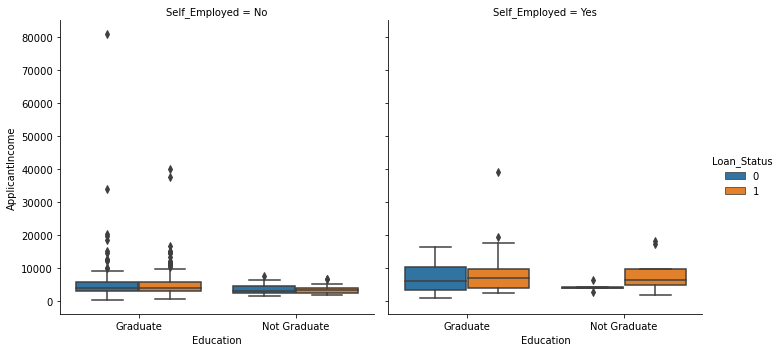

In [20]:
sns.catplot(x='Education', y='ApplicantIncome', data=df, hue='Loan_Status', col='Self_Employed', kind='box')

We can observe that mean applicant income value of Self Employed Graduate is higher than that of who is not self employed. And it is alo interesting to note that there are many non graduate self employed whose loan status is approved. 

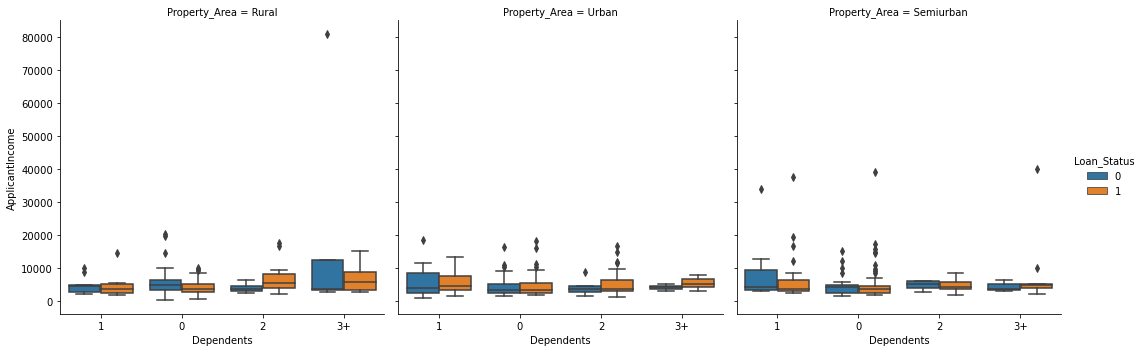

In [21]:
sns.catplot(x='Dependents', y='ApplicantIncome', data=df, hue='Loan_Status',col='Property_Area', kind='box')

We can observe that dependents have mostly common distribution over different areas. Except 3+ dependents in rural area are higher than in urban and semi urban area. In in Urban area one dependents are more.

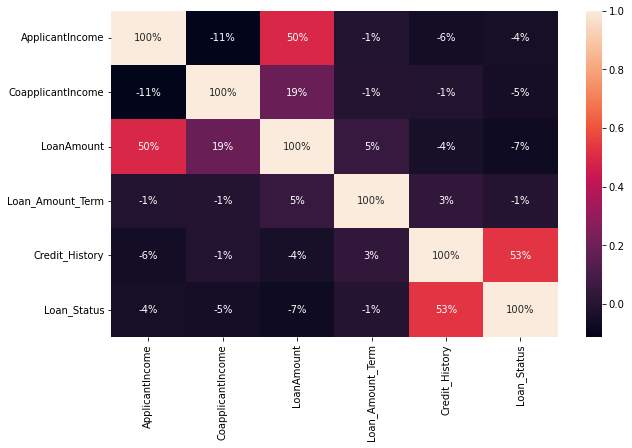

In [23]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

We can observe that Loan_status is highly correlated with credit history out of given features. It'S just continuous data with label, we need to encode categorical columns to numerical , then again we will find the correlation of all the features with our label.

In [24]:
# Encoding using LabelEncoder.
#'Gender','Married','Dependents','Education','Self_Employed','Property_Area'
from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()
df['Gender']=lab_enc.fit_transform(df['Gender'])
df['Married']=lab_enc.fit_transform(df['Married'])
df['Dependents']=lab_enc.fit_transform(df['Dependents'])
df['Education']=lab_enc.fit_transform(df['Education'])
df['Self_Employed']=lab_enc.fit_transform(df['Self_Employed'])
df['Property_Area']=lab_enc.fit_transform(df['Property_Area'])

In [25]:
# let's check the data
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


Data looks good, now let's check the correlation of all the features and label

In [26]:
# correlation matrix
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


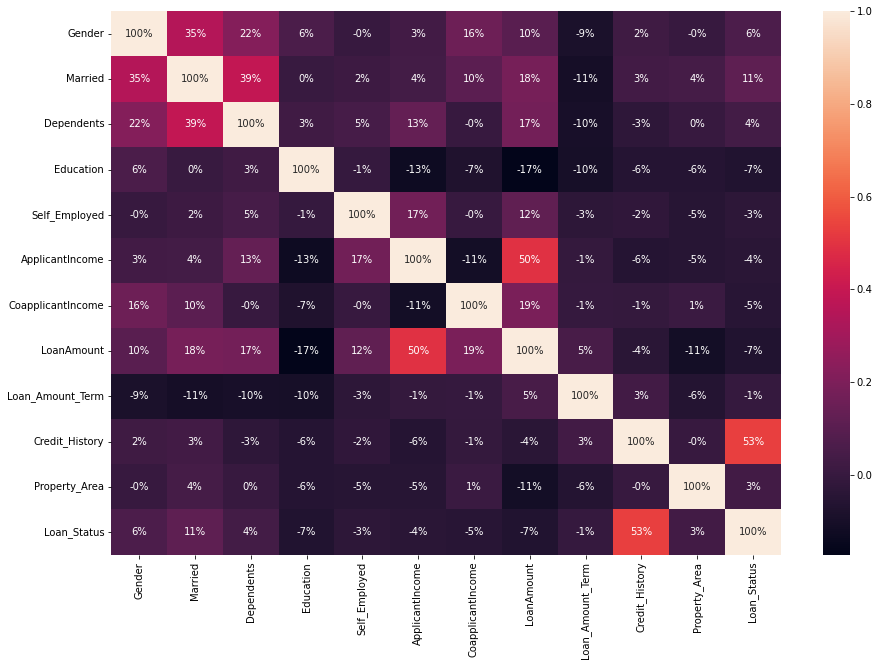

In [27]:
# let's visualize it using Heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

We can observe that the highly correlated feature with label is credit_history. We also see that certain features are negatively correlated, like Education, Self_Employed, LoanAmount, ApplicantIncome, CoaaplicantIncome, Loan_Amount_Term. while others are positively correlated.

In [28]:
# let's chcek for data skewness
df.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

We can see that our data  is highly skewed.
Lets go for powerTransformer processes to transform our data to less skewed data.
We will apply this transformation only on continuous features, not on label or categorical features.

In [31]:
from sklearn.preprocessing import PowerTransformer
pwrTrans=PowerTransformer(method='yeo-johnson')  
feature=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']
df[feature]=pwrTrans.fit_transform(df[feature].values)


In [32]:
df.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome     -0.112745
CoapplicantIncome   -0.127432
LoanAmount           0.044294
Loan_Amount_Term     0.400696
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

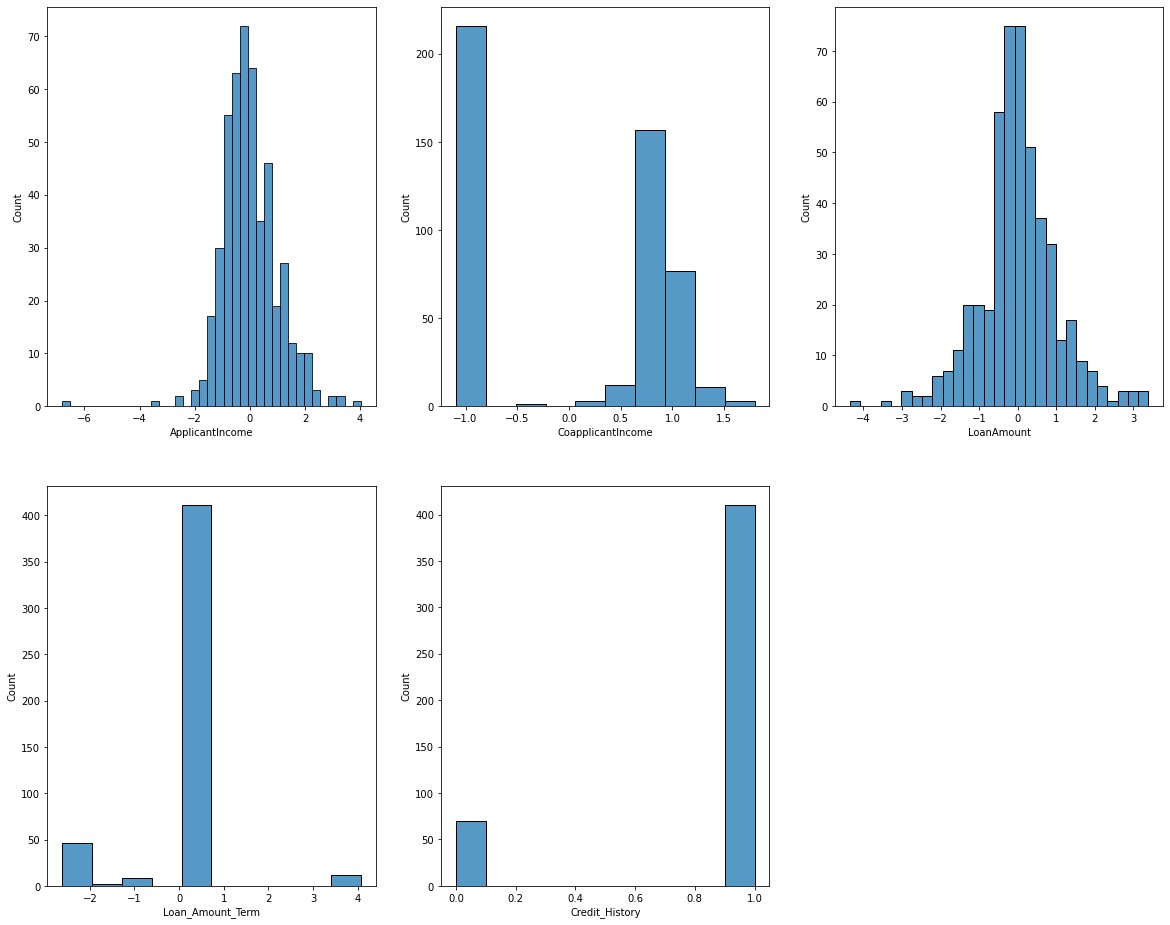

In [109]:
# Let's visualise how our data looks now
conti_features=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History']

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df[conti_features]:
    if plotnumber<=5:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
    plotnumber+=1
plt.show()

   The data looks good now, let's move ahead and scale our data. we can use standadrd scalar to scale our data.

# scaling

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
# let's split the data into Feature and Label.
X=df.drop('Loan_Status',axis=1)
y=df.Loan_Status


In [35]:
scalar= StandardScaler()                         # scaling data using standard scaler
X_scaled=scalar.fit_transform(X)

In [36]:
# let's check the dimension of our data
print(X_scaled.shape)
print(y.shape)

(480, 11)
(480,)


# Model building

In [37]:
# Let's Move ahead and split our data to train data and test data
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=.20,random_state=41)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Logistic regression

In [45]:

LR=LogisticRegression()
maxAccu=0   # maximum accuracy
maxRS=0    #best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=i)
    LR.fit(X_train,y_train)   #fitting the data will train your model
    Y_pred=LR.predict(X_test)    # this is predicted target variable
    acc= accuracy_score(y_test,Y_pred)   # accuracy score
    print('Accuracy ', acc, 'Random state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Max accuracy ", maxAccu, " at random state ", i)
    


Accuracy  0.75 Random state  1
Max accuracy  0.75  at random state  1
Accuracy  0.7916666666666666 Random state  2
Max accuracy  0.7916666666666666  at random state  2
Accuracy  0.775 Random state  3
Accuracy  0.7583333333333333 Random state  4
Accuracy  0.8083333333333333 Random state  5
Max accuracy  0.8083333333333333  at random state  5
Accuracy  0.8083333333333333 Random state  6
Accuracy  0.775 Random state  7
Accuracy  0.7666666666666667 Random state  8
Accuracy  0.8083333333333333 Random state  9
Accuracy  0.8166666666666667 Random state  10
Max accuracy  0.8166666666666667  at random state  10
Accuracy  0.775 Random state  11
Accuracy  0.7583333333333333 Random state  12
Accuracy  0.775 Random state  13
Accuracy  0.8666666666666667 Random state  14
Max accuracy  0.8666666666666667  at random state  14
Accuracy  0.8083333333333333 Random state  15
Accuracy  0.7833333333333333 Random state  16
Accuracy  0.8 Random state  17
Accuracy  0.8333333333333334 Random state  18
Accuracy 

Accuracy  0.8416666666666667 Random state  190
Accuracy  0.8333333333333334 Random state  191
Accuracy  0.8083333333333333 Random state  192
Accuracy  0.8166666666666667 Random state  193
Accuracy  0.8 Random state  194
Accuracy  0.8583333333333333 Random state  195
Accuracy  0.8083333333333333 Random state  196
Accuracy  0.8333333333333334 Random state  197
Accuracy  0.8 Random state  198
Accuracy  0.7833333333333333 Random state  199


In [46]:
print("Best accuracy is ", maxAccu, "at random state ", maxRS)

Best accuracy is  0.8833333333333333 at random state  44


In [60]:
# creating train test split for best random state
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=44)

pred=LR.predict(X_train)
LR_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {LR_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=LR.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 78.33%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.870370    0.767974  0.783333    0.819172      0.801537
recall       0.398305    0.971074  0.783333    0.684690      0.783333
f1-score     0.546512    0.857664  0.783333    0.702088      0.755675
support    118.000000  242.000000  0.783333  360.000000    360.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[ 47  71]
 [  7 235]]

=====================Test Result========================
Accuracy Score : 88.33333333333333%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0          1  accuracy   macro avg  weighted avg
precision   0.944444   0.872549  0.883333    0.908497      0.890523
recall      0.566667   0.988889  0.883333    0.777

In [48]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# validating accuracy
scr= cross_val_score(LR, X_scaled, y, cv=10)
print("Cross Validation Score For Logistic Regression model : ", scr.mean())

Cross Validation Score For Logistic Regression model :  0.80625


# DecisionTree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

#model
DTC= DecisionTreeClassifier()

#fit
DTC.fit(X_train, y_train)

#predict
pred = DTC.predict(X_train)
DTC_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {DTC_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=DTC.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 100.00%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    118.0  242.0       1.0      360.0         360.0


-----------------------------------------------------------
Confusion Matrix : 
 [[118   0]
 [  0 242]]

=====================Test Result========================
Accuracy Score : 77.5%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0          1  accuracy   macro avg  weighted avg
precision   0.542857   0.870588     0.775    0.706723      0.788655
recall      0.633333   0.822222     0.775    0.727778      0.775000
f1-score    0.584615   0.845714     0.775    0.71

In [51]:
# Cross Validation
scr= cross_val_score(DTC,X_scaled,y, cv=10 )
print("Cross Validation score for DecisionTreeClassifier : ", scr.mean())

Cross Validation score for DecisionTreeClassifier :  0.7270833333333333


In [53]:
# Hyper parameter tuning for DecisionTreeClassifier.

grid_param= {'criterion': ['gini', 'entropy','log_loss'],
            'max_depth': range(10,15), 
             'max_leaf_nodes': range(2,10),
             'min_samples_leaf': range(2,8),
            'max_features':["auto", "sqrt", "log2"]}

grid_search=GridSearchCV(estimator=DTC, param_grid=grid_param,
                         cv=5, n_jobs=-1)   # use all the cores in your system for performance improvement. 

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'max_leaf_nodes': 7,
 'min_samples_leaf': 5}

In [57]:
DTC=DecisionTreeClassifier(criterion='gini', max_depth=11, max_leaf_nodes=7, min_samples_leaf=5, max_features='log2')
DTC.fit(X_train,y_train)
DTC_pred= DTC.predict(X_test)
# chcek accuracy
print(f'{accuracy_score(y_test,DTC_pred)*100}%')

87.5%


The accuracy score increases from 77.5% to 87.5%

# Ensemble Technique

In [59]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier()

RF.fit(X_train,y_train)
pred=RF.predict(X_train)
RF_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {RF_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=RF.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 100.00%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    118.0  242.0       1.0      360.0         360.0


-----------------------------------------------------------
Confusion Matrix : 
 [[118   0]
 [  0 242]]

=====================Test Result========================
Accuracy Score : 86.66666666666667%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0          1  accuracy   macro avg  weighted avg
precision   0.791667   0.885417  0.866667    0.838542      0.861979
recall      0.633333   0.944444  0.866667    0.788889      0.866667
f1-score    0.703704   0.913978  0.8

In [63]:
# Cross validation
scr= cross_val_score(RF,X_scaled,y,cv=10)
print("Cross validation Score of RandomForestClassifier model is : ", scr.mean())

Cross validation Score of RandomForestClassifier model is :  0.79375


In [69]:
# Hyper Parameter Tunning Randome forest Classifier
RandomForestClassifier()
#creating parameter list to pass in GridSearchCV
parameters={'max_features': ['auto','sqrt','log2'],
           'n_estimators': [10,40,60,100],
            'max_depth': range(2,30,3),
            'criterion': ['gini','entropy'],
           'random_state' :[3,40,42]}

GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring= "accuracy")
GCV.fit(X_train,y_train)    #fitting data into model
GCV.best_params_  # printing best parameter found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 40,
 'random_state': 3}

In [70]:
GCV_pred=GCV.best_estimator_.predict(X_test)   #predicting using best parameters
accuracy_score(y_test, GCV_pred)   # checking the accuracy

0.8833333333333333

# SVC

In [71]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_train)
svc_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {svc_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=svc.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")



=====================Train Result========================
Accuracy Score : 83.33%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.900000    0.820000  0.833333    0.860000      0.844000
recall       0.500000    0.976190  0.833333    0.738095      0.833333
f1-score     0.642857    0.891304  0.833333    0.767081      0.816770
support    108.000000  252.000000  0.833333  360.000000    360.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[ 54  54]
 [  6 246]]

=====================Test Result========================
Accuracy Score : 88.33333333333333%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0          1  accuracy   macro avg  weighted avg
precision   0.944444   0.872549  0.883333    0.908497      0.890523
recall      0.566667   0.988889  0.883333    0.777

In [72]:
# cross validation
scr=cross_val_score(svc, X_scaled, y, cv=9)
print("Cross Validation score for SVC model : ", scr.mean())

Cross Validation score for SVC model :  0.8084090379687864


# AdaBoost Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier

#model
ADA= AdaBoostClassifier()

#fit
ADA.fit(X_train,y_train)

#predict
pred=ADA.predict(X_train)
ADA_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {ADA_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=ADA.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")



=====================Train Result========================
Accuracy Score : 85.56%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy   macro avg  weighted avg
precision    0.883721    0.846715  0.855556    0.865218      0.858845
recall       0.644068    0.958678  0.855556    0.801373      0.855556
f1-score     0.745098    0.899225  0.855556    0.822161      0.848705
support    118.000000  242.000000  0.855556  360.000000    360.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[ 76  42]
 [ 10 232]]

=====================Test Result========================
Accuracy Score : 85.83333333333333%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0          1  accuracy   macro avg  weighted avg
precision   0.809524   0.868687  0.858333    0.839105      0.853896
recall      0.566667   0.955556  0.858333    0.761

In [74]:
# cross Validation
scr=cross_val_score(ADA, X_scaled, y, cv=9)
print("Cross Validation score for AdaBoostClassifier model : ", scr.mean())

Cross Validation score for AdaBoostClassifier model :  0.7791754018169113






# Let's Plot ROC AUC Curve to Choose the best Model.

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

In [76]:
LR= LogisticRegression()
DTC = DecisionTreeClassifier()
RF = RandomForestClassifier()
svc= SVC()
ADA= AdaBoostClassifier()

In [104]:
# Train test split

x= X_scaled
y=df['Loan_Status']
x_train,x_test,Y_train,Y_test=train_test_split(x,y, test_size=0.25, random_state=14)

# Training with all classifier
LR.fit(x_train,Y_train)
DTC.fit(x_train,Y_train)
RF.fit(x_train, Y_train)
ADA.fit(x_train,Y_train)
svc.fit(x_train,Y_train)

print("All models are trained")

All models are trained


In [105]:
# All models score captured
LR.score(x_test,Y_test)
DTC.score(x_test,Y_test)
RF.score(x_test,Y_test)
ADA.score(x_test,Y_test)
svc.score(x_test,Y_test)

print("All models test score captured")

All models test score captured


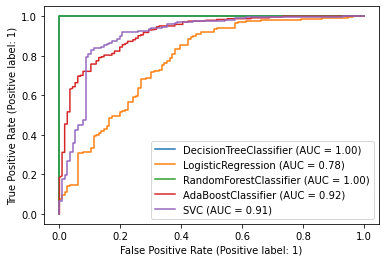

In [106]:
# Let's check ROC AUC for fitted model

# how well our model perform on training data

disp= plot_roc_curve(DTC, x_train, Y_train)

plot_roc_curve(LR, x_train,Y_train, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_train,Y_train, ax=disp.ax_) 

plot_roc_curve(ADA, x_train,Y_train, ax=disp.ax_) 

plot_roc_curve(svc, x_train,Y_train, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()



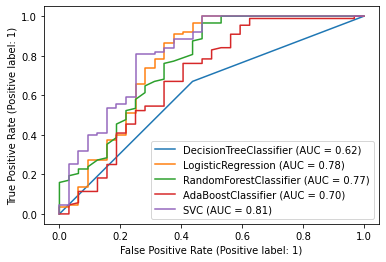

In [107]:
# How well our model works with test data

disp= plot_roc_curve(DTC, x_test, Y_test)

plot_roc_curve(LR, x_test,Y_test, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(ADA, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(svc, x_test,Y_test, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()


From here we can observe that Logistic Regression is the one with almost similar testing and training score. Although it is less then SVC, but the difference between training and testing score is almost close so our final Model will be Logistic regression with an accuracy score of 78%.

Now let's move ahaed with saving the model.

# Saving the Model.

In [108]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(LR, "Loan_Application_status_prediction.pkl")

['Loan_Application_status_prediction.pkl']